In [1]:
# import the required libraries
import numpy as np
import pandas as pd

In [2]:
# read the dataset
data = pd.read_csv("CHD_preprocessed.csv")

In [3]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Educational Status is not relevant to this study

In [5]:
data.drop("education", inplace=True, axis=1)

In [6]:
data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   currentSmoker    4133 non-null   int64  
 3   cigsPerDay       4133 non-null   float64
 4   BPMeds           4133 non-null   float64
 5   prevalentStroke  4133 non-null   int64  
 6   prevalentHyp     4133 non-null   int64  
 7   diabetes         4133 non-null   int64  
 8   totChol          4133 non-null   float64
 9   sysBP            4133 non-null   float64
 10  diaBP            4133 non-null   float64
 11  BMI              4133 non-null   float64
 12  heartRate        4133 non-null   float64
 13  glucose          4133 non-null   float64
 14  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 484.5 KB


In [8]:
# Check whether the dataset is balanced

In [9]:
data["TenYearCHD"].value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

In [10]:
import matplotlib.pyplot as plt

<AxesSubplot:>

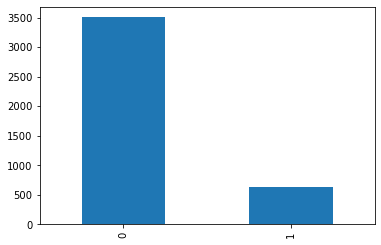

In [11]:
data["TenYearCHD"].value_counts().plot(kind="bar")

In [12]:
X = np.asarray(data[['age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(data['TenYearCHD'])

In [13]:
# Feature Scaling
# Standardaizaton of the dataset
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()

In [14]:
X_scale = Standard.fit_transform(X)

In [15]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=42, test_size=0.25)

In [16]:
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression()

In [17]:
LogReg_model = LogReg.fit(X_train, Y_train)

In [18]:
Y_pred = LogReg_model.predict(X_test)

In [19]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
# Evaluation of the model
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       857
           1       0.80      0.05      0.09       177

    accuracy                           0.83      1034
   macro avg       0.82      0.52      0.50      1034
weighted avg       0.83      0.83      0.77      1034



In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

<AxesSubplot:>

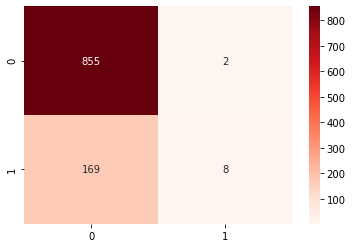

In [22]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")

In [23]:
# Using Stratified Sampling while Splitting the dataset
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_scale, y, random_state=1, stratify=y, test_size=0.25)

In [24]:
from collections import Counter

In [25]:
print(Counter(Y_train_1))

Counter({0: 2628, 1: 471})


In [26]:
LogReg_model_1 = LogReg.fit(X_train_1, Y_train_1)

In [27]:
Y_pred_1 = LogReg_model.predict(X_test_1)

In [28]:
print(classification_report(Y_test_1, Y_pred_1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       877
           1       0.73      0.07      0.13       157

    accuracy                           0.85      1034
   macro avg       0.80      0.53      0.52      1034
weighted avg       0.84      0.85      0.80      1034



In [29]:
cm_1 = confusion_matrix(Y_test_1, Y_pred_1)

<AxesSubplot:>

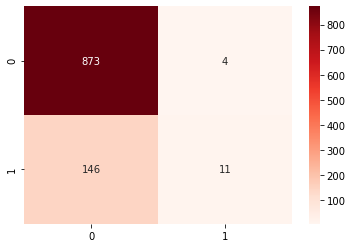

In [30]:
sns.heatmap(cm_1, annot=True, fmt="d", cmap="Reds")

In [31]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_scale, y, random_state=1, stratify=y, test_size=0.3)

In [32]:
LogReg_model_2 = LogReg.fit(X_train_2, Y_train_2)

In [33]:
print(Counter(Y_train_2))

Counter({0: 2453, 1: 440})


In [34]:
Y_pred_2 = LogReg_model.predict(X_test_2)

In [35]:
print(classification_report(Y_test_2, Y_pred_2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1052
           1       0.67      0.06      0.12       188

    accuracy                           0.85      1240
   macro avg       0.76      0.53      0.52      1240
weighted avg       0.83      0.85      0.80      1240



In [36]:
cm_2 = confusion_matrix(Y_test_2, Y_pred_2)

In [37]:
cm_1

array([[873,   4],
       [146,  11]], dtype=int64)

<AxesSubplot:>

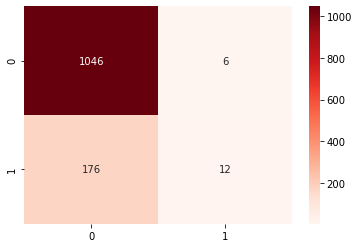

In [38]:
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Reds")